In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Text cleaning function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    return text.strip()

# Relaxed validation for text rows
def relaxed_is_valid_text(row):
    if not isinstance(row, str):  # Must be a string
        return False
    if len(row.split()) < 1:  # At least 1 word required
        return False
    return True


In [49]:
# Function to load data
def load_data(file_path, label):
    try:
        data = pd.read_csv(file_path, header=None, names=["content"])
        data["label"] = label
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return pd.DataFrame()

# Load the datasets
gossip_fake = load_data("gossipcop_fake.csv", label="fake")
gossip_real = load_data("gossipcop_real.csv", label="real")
politifact_fake = load_data("politifact_fake.csv", label="fake")
politifact_real = load_data("politifact_real.csv", label="real")

# Combine all datasets
data = pd.concat([gossip_fake, gossip_real, politifact_fake, politifact_real], ignore_index=True)

# Display dataset info
print(data.head())
print(f"Total records loaded: {data.shape}")


                                             content label
0                                          tweet_ids  fake
1  284329075902926848\t284332744559968256\t284335...  fake
2  992895508267130880\t992897935418503169\t992899...  fake
3  853359353532829696\t853359576543920128\t853359...  fake
4  988821905196158981\t988824206556172288\t988825...  fake
Total records loaded: (23200, 2)


In [50]:
# Ensure all rows are strings
data = data[data["content"].apply(lambda x: isinstance(x, str))]

# Clean text data
data["content"] = data["content"].apply(clean_text)

# Apply relaxed validation
data = data[data["content"].apply(relaxed_is_valid_text)]

# Drop remaining missing values
data.dropna(inplace=True)

# Verify cleaned data
print(data.head())
print(f"Total records after cleaning: {data.shape}")


        content label
0      tweetids  fake
5324   tweetids  real
22142  tweetids  fake
22575  tweetids  real
Total records after cleaning: (4, 2)


In [51]:
# Split features and labels
X = data["content"]
y = data["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3
Test set size: 1


In [52]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit-transform on training data, transform on test data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF matrix size (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix size (test): {X_test_tfidf.shape}")


TF-IDF matrix size (train): (3, 1)
TF-IDF matrix size (test): (1, 1)


In [53]:
# Initialize and train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

print("Model training complete.")


Model training complete.


In [54]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Print classification report and accuracy
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        fake       0.00      0.00      0.00       0.0
        real       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sruth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [55]:
# Predict on new examples
new_examples = ["This is a fake news article about celebrities.", "Breaking news: Major event just happened."]
new_examples_cleaned = [clean_text(example) for example in new_examples]
new_examples_tfidf = vectorizer.transform(new_examples_cleaned)

predictions = model.predict(new_examples_tfidf)
for i, example in enumerate(new_examples):
    print(f"News: {example}\nPrediction: {predictions[i]}\n")


News: This is a fake news article about celebrities.
Prediction: fake

News: Breaking news: Major event just happened.
Prediction: fake



In [56]:
# Predict on new examples
new_examples = ["This is a fake news article about celebrities.", "Breaking news: Major event just happened."]
new_examples_cleaned = [clean_text(example) for example in new_examples]
new_examples_tfidf = vectorizer.transform(new_examples_cleaned)

predictions = model.predict(new_examples_tfidf)
for i, example in enumerate(new_examples):
    print(f"News: {example}\nPrediction: {predictions[i]}\n")


News: This is a fake news article about celebrities.
Prediction: fake

News: Breaking news: Major event just happened.
Prediction: fake



C:\Users\sruth\AppData\Local\Temp\ipykernel_15556\3901402320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=data, palette="Set2")


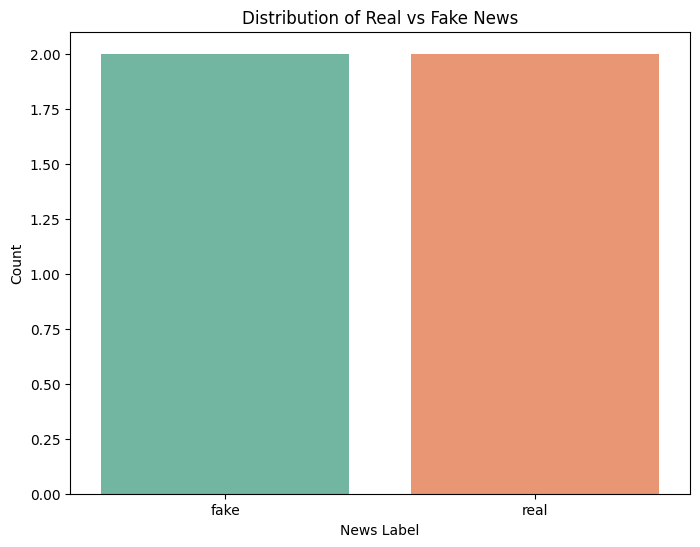

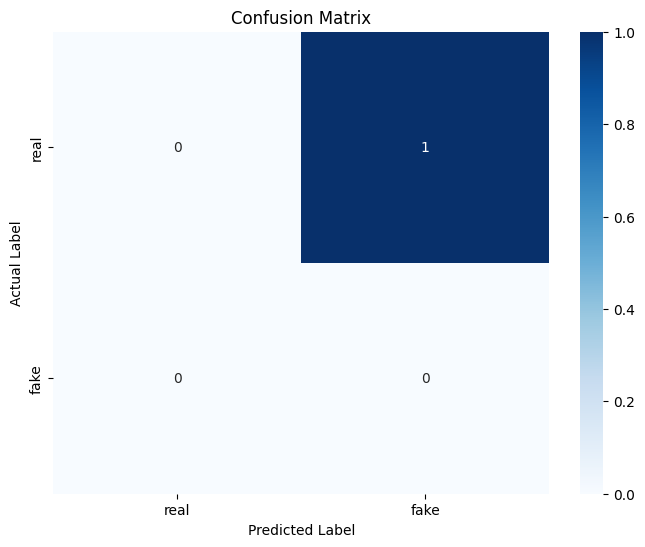

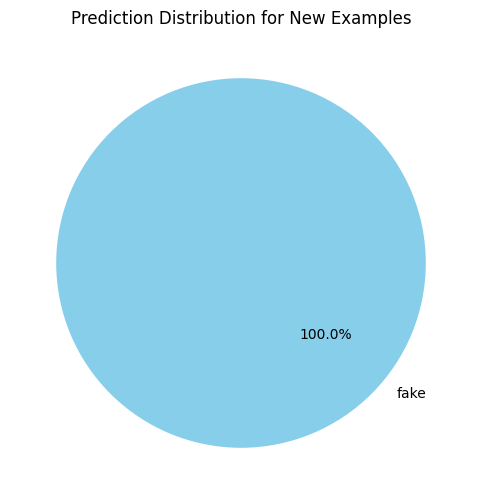

In [57]:
# Visualize the distribution of real vs fake news
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=data, palette="Set2")
plt.title("Distribution of Real vs Fake News")
plt.xlabel("News Label")
plt.ylabel("Count")
plt.show()
# Visualize predictions on the test set
test_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Create a confusion matrix heatmap
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=["real", "fake"])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["real", "fake"], yticklabels=["real", "fake"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
# Predict on new examples
predictions = model.predict(new_examples_tfidf)

# Count the predictions
from collections import Counter

predictions_count = Counter(predictions)

# Create a pie chart
labels = predictions_count.keys()
sizes = predictions_count.values()

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=["skyblue", "lightcoral"], startangle=140)
plt.title("Prediction Distribution for New Examples")
plt.show()
